## Projeto - Análise Multivariada

<p align="left"/> Aluno: Tales Nobre Leite Dias de Oliveira - Matrícula: 20200025983 </p>
<p align="left"/> Professor: Sérgio Bezerra </p>

#### Importando Bibliotecas

In [397]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#### Pré-Processamento e Tratamento dos dados

In [398]:
df = pd.read_csv("data/House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [399]:
df.drop(['Posted On', 'Area Locality'], axis=1, inplace=True)
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [400]:
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [401]:
df = df.drop(df[df['Area Type'] == 'Built Area'].index)

In [402]:
df.Floor = df['Floor'].str.extract('(\d+)')
df.isnull().sum()
df.dropna(inplace=True)
df.Floor = df.Floor.astype(int)

In [403]:
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [404]:
max_out = df[df['Rent'] > 250000].index
min_out = df[(df['Rent'] < 5000)].index

df.drop(max_out, inplace=True)
df.drop(min_out, inplace=True)

In [405]:
df["City"].value_counts()

Mumbai       913
Chennai      876
Bangalore    869
Hyderabad    855
Delhi        590
Kolkata      491
Name: City, dtype: int64

In [406]:
grouped = df.groupby('City')

In [407]:
df = grouped.apply(lambda x: x.sample(min(len(x), 400))).reset_index(drop=True)
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,16000,1100,2,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1,2,9000,1200,3,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
2,2,20000,1150,2,Carpet Area,Bangalore,Furnished,Family,2,Contact Agent
3,2,11000,600,1,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4,1,6500,500,2,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
2395,3,95000,900,4,Carpet Area,Mumbai,Semi-Furnished,Family,3,Contact Agent
2396,3,85000,1000,4,Carpet Area,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent
2397,2,30000,710,12,Carpet Area,Mumbai,Unfurnished,Family,2,Contact Agent
2398,1,60000,430,1,Carpet Area,Mumbai,Furnished,Bachelors/Family,1,Contact Agent


In [408]:
df["City"].value_counts()

Bangalore    400
Chennai      400
Delhi        400
Hyderabad    400
Kolkata      400
Mumbai       400
Name: City, dtype: int64

In [409]:
def cat_var(df): 
    col_type = df.dtypes
    col_names = list(df)
    cat_var_index = [i for i, x in enumerate(col_type) if x=='object']
    cat_var_name = [x for i, x in enumerate(col_names) if i in cat_var_index]
    return cat_var_name

def column_encoder(df, cat_var_list):
    label_list = []
    for cat_feature in cat_var_list: 
        le = LabelEncoder()
        le.fit(df[cat_feature])    
        label_list.append(list(le.classes_))
        df[cat_feature] = le.transform(df[cat_feature])
    return df, label_list

cat_var_list = cat_var(df)
df_encoded, label_list = column_encoder(df, cat_var_list)


In [410]:
print("Mean House Rent:", round(df["Rent"].mean()))

print("Median House Rent:", round(df["Rent"].median()))

print("Highest House Rent:", round(df["Rent"].max()))

print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 28216
Median House Rent: 15000
Highest House Rent: 250000
Lowest House Rent: 5000


In [411]:
def split_to_train_test(df, label_column, train_frac=0.8):
    train_df, test_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=train_frac)
        lbl_test_df = lbl_df.drop(lbl_train_df.index)
        train_df = train_df.append(lbl_train_df)
        test_df = test_df.append(lbl_test_df)

    return train_df, test_df

In [412]:
train_df, test_df = split_to_train_test(df, 'City', train_frac=0.8)

X_train = train_df.drop('Rent', axis=1)
y_train = train_df['Rent']

X_test = test_df.drop('Rent', axis=1)
y_test = test_df['Rent']

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\2978623824.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\2978623824.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\2978623824.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\2978623824.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\2978623824.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [413]:
X_train

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
81,2,800,2,1,0,1,1,1,1
64,1,500,1,1,0,1,1,1,1
313,2,1000,1,1,0,1,1,2,1
241,2,1100,2,1,0,1,1,2,1
245,1,1200,3,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
2256,2,600,5,0,5,1,0,2,1
2155,2,800,12,0,5,1,1,2,0
2081,1,430,4,0,5,2,2,1,0
2115,2,750,3,1,5,1,1,2,1


In [414]:
X_train.dtypes

BHK                  int64
Size                 int64
Floor                int32
Area Type            int32
City                 int32
Furnishing Status    int32
Tenant Preferred     int32
Bathroom             int64
Point of Contact     int32
dtype: object

#### Estimativa da amostra com 480 valores (Usando Linear Regression e Random Forest Regression)

In [415]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([ 1.65363877e+04, -6.58602553e+03, -8.83534351e+03, -3.05366531e+03,
       -5.30298328e+03,  5.06487824e+04, -6.26925900e+03,  1.05060891e+04,
        3.80025617e+04, -1.03867098e+04, -1.71334420e+03, -4.33670756e+03,
        1.87857057e+04, -3.51843975e+03,  1.30120155e+04,  2.24868245e+04,
        1.30040275e+04,  2.10270356e+04,  1.65443758e+04,  7.22664884e+03,
        3.13478042e+04,  1.55701120e+04, -1.01183858e+04,  1.99404437e+04,
       -3.78980257e+02, -5.30298328e+03,  1.52533455e+04,  3.83757587e+04,
       -1.01183858e+04,  8.87907781e+04, -8.04347335e+02,  4.60740122e+04,
        1.94993670e+04, -2.08738959e+03, -5.61974982e+03,  3.80510041e+04,
       -2.87292460e+03,  1.04713332e+05, -9.54101675e+03,  2.39663172e+04,
        1.01211764e+04,  1.04379430e+04,  5.05806362e+04,  1.94953730e+04,
        1.30040275e+04,  4.74115219e+04, -8.19382238e+03,  1.65363877e+04,
        9.15490073e+03,  2.71334684e+04,  2.77645535e+03,  1.55781001e+04,
        3.42828539e+04,  

In [416]:
model.score(X_train, y_train)

0.514046932625204

In [417]:
y_pred_nnls = model.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.6423235593889616


In [418]:
dfc = pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred.astype(int)})
dfc['Index'] = dfc.index

dfc

,Valor Real,Valor Previsto,Index
0,16000,16536,0
4,6500,-6586,4
7,7500,-8835,7
16,5500,-3053,16
18,9000,-5302,18
...,...,...,...
2382,93000,96769,2382
2383,43000,36719,2383
2384,55000,44730,2384
2389,45000,51161,2389


In [419]:
px.line(dfc, x='Index', y=['Valor Real', 'Valor Previsto'], color='variable', symbol='variable', title='Linear Regressor', labels={'value': 'Valor do Imóvel','Index':'ID'})

In [420]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([ 16629.08333333,   6809.43452381,  10702.08333333,   7383.        ,
         9938.25      ,  39060.        ,   8029.91666667,  18116.96      ,
        23190.        ,   9549.50333333,  13708.83333333,   7464.48214286,
        12953.33333333,  12906.        ,  13490.83333333,  31855.        ,
        13477.5       ,  22187.        ,  24105.        ,  19081.64285714,
        29776.91      ,  13096.        ,  11362.33333333,  17161.80952381,
        14456.16666667,   8274.23809524,  14397.        ,  23570.        ,
        11362.33333333, 105240.        ,  10753.75      ,  61040.        ,
        13383.54      ,   8527.        ,   8040.83333333,  39075.        ,
        10621.5       , 174680.        ,  14557.64166667,  29353.75      ,
        12231.8452381 ,  16608.01190476,  59950.        ,  23170.        ,
        12661.9047619 ,  39080.        ,  10338.83333333,  16629.08333333,
        12771.97619048,  48718.        ,  13795.        ,  27120.        ,
        16685.        ,  

In [421]:
model.score(X_train, y_train)

0.9611856582445776

In [422]:
r2_score(y_test,y_pred)

0.7983813098311754

In [423]:
dfc = pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred.astype(int)})
dfc['Index'] = dfc.index

dfc

,Valor Real,Valor Previsto,Index
0,16000,16629,0
4,6500,6809,4
7,7500,10702,7
16,5500,7383,16
18,9000,9938,18
...,...,...,...
2382,93000,165900,2382
2383,43000,39062,2383
2384,55000,91730,2384
2389,45000,49229,2389


In [424]:
px.line(dfc, x='Index', y=['Valor Real', 'Valor Previsto'], color='variable', symbol='variable', title='Random Forest Regressor', labels={ 'value': 'Valor do Imóvel','Index':'ID'})

#### Análise de Componentes Principais (PCA)

In [425]:
label = df['Rent']
df_normalizado = df.drop(columns=['Rent'])
df_normalizado = (df_normalizado - df_normalizado.mean()) / df_normalizado.std()
pca = PCA(n_components=2)
pca.fit(df_normalizado)
df_pca = pd.DataFrame(pca.transform(df_normalizado), columns=['PC1', 'PC2'])

In [426]:
df_pca

,PC1,PC2
0,-0.568283,1.694630
1,-0.430928,1.698084
2,0.956178,0.203685
3,-1.003364,1.464744
4,-2.227136,0.752732
...,...,...
2395,2.235014,-0.943547
2396,2.266556,-1.213634
2397,1.183925,-2.135649
2398,-0.570212,-2.524273


In [427]:
df_pca_label = pd.concat([df_pca, label], axis=1)
df_pca_label.columns = ['PC1', 'PC2', 'target']
df_pca_label

,PC1,PC2,target
0,-0.568283,1.694630,16000
1,-0.430928,1.698084,9000
2,0.956178,0.203685,20000
3,-1.003364,1.464744,11000
4,-2.227136,0.752732,6500
...,...,...,...
2395,2.235014,-0.943547,95000
2396,2.266556,-1.213634,85000
2397,1.183925,-2.135649,30000
2398,-0.570212,-2.524273,60000


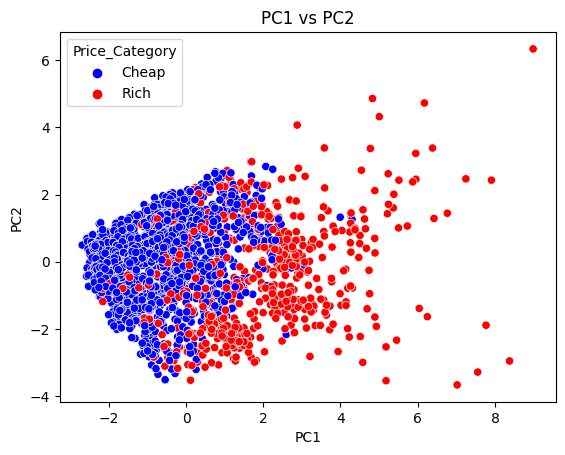

In [428]:
price = 28000

df_pca_label['Price_Category'] = ['Cheap' if target <= price else 'Rich' for target in df_pca_label['target']]

sns.scatterplot(data=df_pca_label, x='PC1', y='PC2', hue='Price_Category', palette=['blue', 'red'])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')

plt.show()

c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



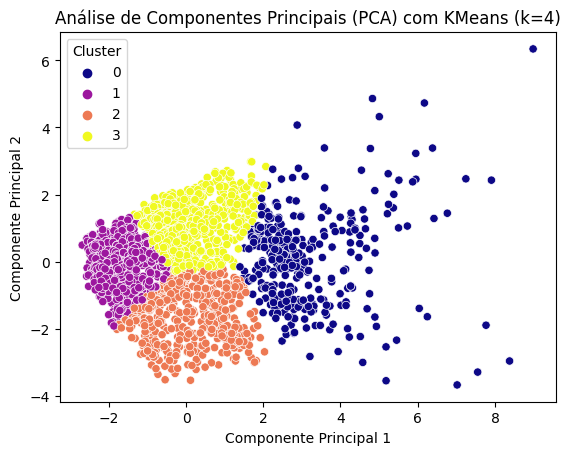

In [429]:
km = KMeans(n_clusters=4, random_state=42)
labels_kmeans = km.fit_predict(df_pca)
df_pca_kmeans = pd.concat([df_pca, pd.DataFrame(labels_kmeans, columns=['Cluster'])], axis=1)

sns.scatterplot(data=df_pca_kmeans, x='PC1', y='PC2', hue='Cluster', palette='plasma')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com KMeans (k=4)')

plt.show()

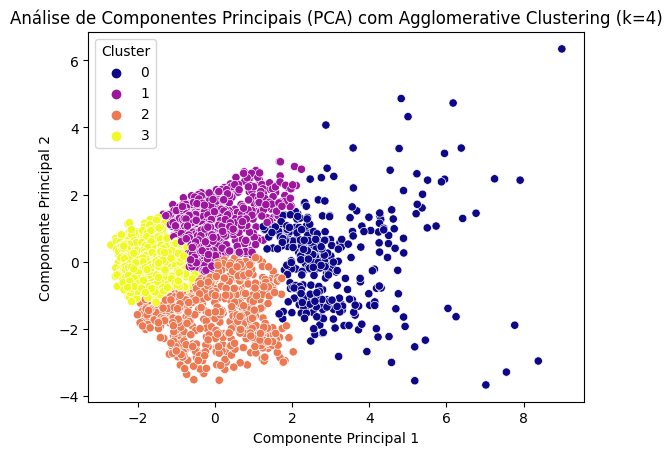

In [430]:
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(df_pca)
df_pca_agg = pd.concat([df_pca, pd.DataFrame(labels_agg, columns=['Cluster'])], axis=1)

sns.scatterplot(data=df_pca_agg, x='PC1', y='PC2', hue='Cluster', palette='plasma')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com Agglomerative Clustering (k=4)')

plt.show()

c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



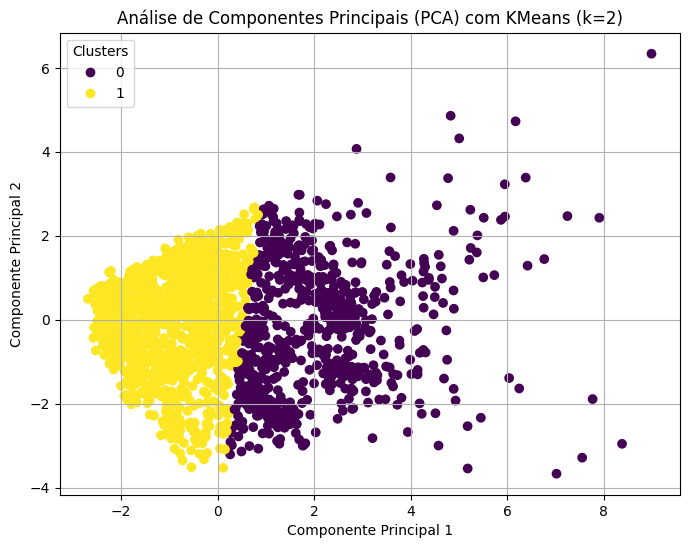

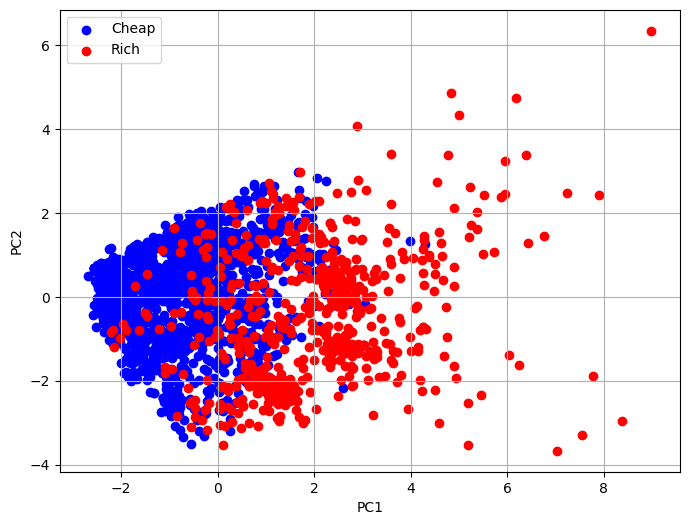

In [431]:
km = KMeans(n_clusters=2, random_state=42)
labels_kmeans = km.fit_predict(df_pca)
df_pca_kmeans = pd.concat([df_pca, pd.DataFrame(labels_kmeans)], axis=1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca_kmeans['PC1'], df_pca_kmeans['PC2'], c=df_pca_kmeans[0], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com KMeans (k=2)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_label[df_pca_label['target'] <= price]['PC1'], df_pca_label[df_pca_label['target'] <= price]['PC2'], color='blue', label='Cheap')
plt.scatter(df_pca_label[df_pca_label['target'] > price]['PC1'], df_pca_label[df_pca_label['target'] > price]['PC2'], color='red', label='Rich')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

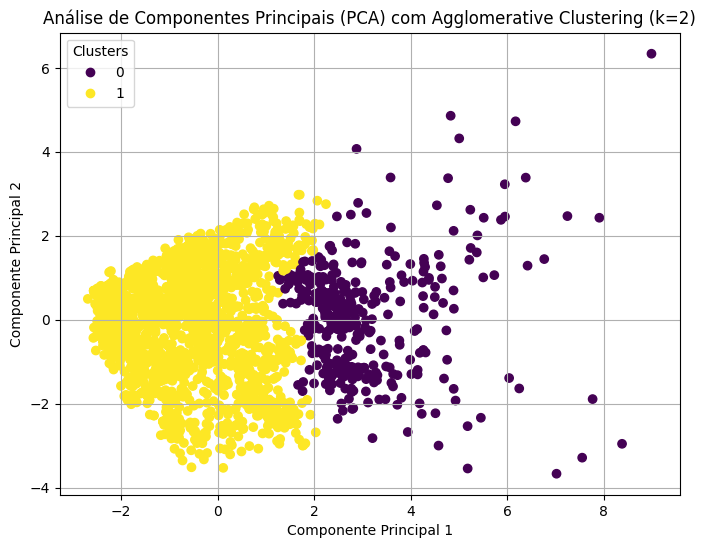

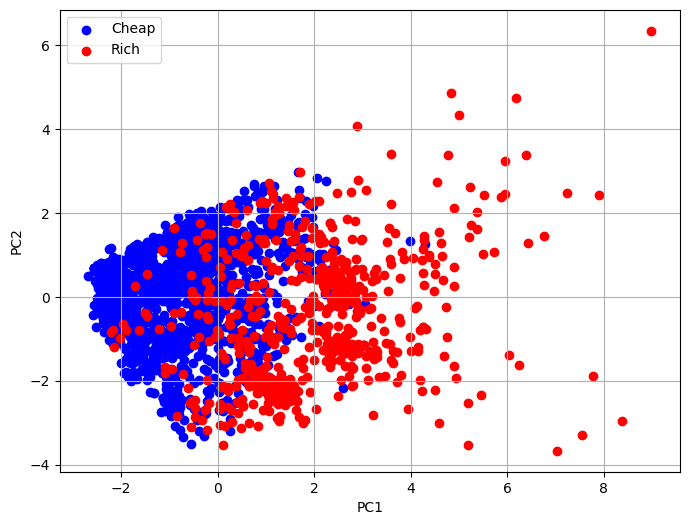

In [432]:
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(df_pca)
labels_agg = np.where(labels_agg == 0, 1, 0)
df_pca_agg = pd.concat([df_pca, pd.DataFrame(labels_agg)], axis=1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca_agg['PC1'], df_pca_agg['PC2'], c=df_pca_agg[0], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com Agglomerative Clustering (k=2)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_label[df_pca_label['target'] <= price]['PC1'], df_pca_label[df_pca_label['target'] <= price]['PC2'], color='blue', label='Cheap')
plt.scatter(df_pca_label[df_pca_label['target'] > price]['PC1'], df_pca_label[df_pca_label['target'] > price]['PC2'], color='red', label='Rich')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

#### Análise de Correspondência

In [433]:
df.corr()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
BHK,1.000000,0.482802,0.656125,0.210289,-0.133986,0.000617,-0.083188,0.034002,0.747969,-0.222798
Rent,0.482802,1.000000,0.486135,0.522524,-0.299733,0.285119,-0.193237,0.031366,0.609029,-0.509454
Size,0.656125,0.486135,1.000000,0.169679,-0.061879,-0.099132,-0.127453,0.035926,0.705541,-0.199242
Floor,0.210289,0.522524,0.169679,1.000000,-0.199705,0.288751,-0.095026,0.142614,0.322665,-0.353023
Area Type,-0.133986,-0.299733,-0.061879,-0.199705,1.000000,-0.238415,0.049738,0.182299,-0.155990,0.520719
City,0.000617,0.285119,-0.099132,0.288751,-0.238415,1.000000,0.031359,0.017728,0.018992,-0.274237
Furnishing Status,-0.083188,-0.193237,-0.127453,-0.095026,0.049738,0.031359,1.000000,-0.086061,-0.141088,0.120297
Tenant Preferred,0.034002,0.031366,0.035926,0.142614,0.182299,0.017728,-0.086061,1.000000,0.050637,0.088065
Bathroom,0.747969,0.609029,0.705541,0.322665,-0.155990,0.018992,-0.141088,0.050637,1.000000,-0.314413
Point of Contact,-0.222798,-0.509454,-0.199242,-0.353023,0.520719,-0.274237,0.120297,0.088065,-0.314413,1.000000


In [434]:
columns = ['Rent', 'Size', 'Floor']

In [435]:
dfac = df[columns]

In [436]:
df[columns].describe()

,Rent,Size,Floor
count,2400.000000,2400.000000,2400.000000
mean,28216.330000,944.088750,3.605417
std,35849.280844,602.519677,4.895291
min,5000.000000,10.000000,1.000000
25%,10000.000000,550.000000,1.000000
50%,15000.000000,842.500000,2.000000
75%,30000.000000,1200.000000,4.000000
max,250000.000000,8000.000000,65.000000


In [437]:
def cat_rent(Rent):
    if Rent <= 12000:
       return '0'
    elif Rent < 25000:
       return '1'
    else:
        return '2'
dfac['Valor'] = dfac['Rent'].apply(cat_rent)

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\1850514413.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [438]:
dfac.Size.value_counts()

1000    129
800     122
600     118
1200    113
700      98
       ... 
68        1
48        1
1901      1
615       1
758       1
Name: Size, Length: 416, dtype: int64

In [439]:
def cat_size(Size):
    if Size <= 650:
       return '0'
    elif Size < 1100:
       return '1'
    else:
        return '2'
dfac['Tamanho'] = dfac['Size'].apply(cat_size)

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\2449014727.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [440]:
dfac.Tamanho.value_counts()

0    836
1    787
2    777
Name: Tamanho, dtype: int64

In [441]:
def cat_floor(Floor):
    if Floor <= 2:
       return '0'
    elif Floor < 5:
       return '1'
    else:
        return '2'
dfac['Andar'] = dfac['Floor'].apply(cat_floor)

C:\Users\tales\AppData\Local\Temp\ipykernel_23044\3166717109.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [442]:
dfac.Andar.value_counts()

0    1409
1     573
2     418
Name: Andar, dtype: int64

In [443]:
dfac

,Rent,Size,Floor,Valor,Tamanho,Andar
0,16000,1100,2,1,2,0
1,9000,1200,3,0,2,1
2,20000,1150,2,1,2,0
3,11000,600,1,0,0,0
4,6500,500,2,0,0,0
...,...,...,...,...,...,...
2395,95000,900,4,2,1,1
2396,85000,1000,4,2,1,1
2397,30000,710,12,2,1,2
2398,60000,430,1,2,0,0


In [444]:
def matriz_contingencia(dataframe, coluna1, coluna2):
 matriz_contingencia = pd.crosstab(dataframe[coluna1], dataframe[coluna2])
 return matriz_contingencia

In [445]:
matriz_contingencia(dfac, 'Valor', 'Tamanho')

Tamanho,0,1,2
Valor,,,
0,505,323,87
1,195,280,263
2,136,184,427


In [446]:
matriz_contingencia(dfac, 'Valor', 'Andar')

Andar,0,1,2
Valor,,,
0,689,199,27
1,458,216,64
2,262,158,327


In [447]:
matriz_contingencia(dfac, 'Tamanho', 'Andar')

Andar,0,1,2
Tamanho,,,
0,519,220,97
1,484,175,128
2,406,178,193
